In [1]:
# Source of data: https://wonder.cdc.gov/controller/datarequest/D153;jsessionid=A591795EE943C0BBA572E5A6D51D45F7

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read in datasets and clean data

cancer_rates = pd.read_csv("Cancer Rates.csv")
cancer_rates_by_race = pd.read_csv("Cancer Rates Race.csv")

for idx, row in cancer_rates.iterrows():
    # drop rows with unreliable data
    if "Unreliable" in row["Mortality-Incidence Age-Adjusted Rate Ratio"]:
        cancer_rates = cancer_rates.drop(idx)

# convert Mortality-Incidence Age-Adjusted Rate Ratio column to floats
cancer_rates["Mortality-Incidence Age-Adjusted Rate Ratio"] = cancer_rates["Mortality-Incidence Age-Adjusted Rate Ratio"].astype('float')

In [3]:
cancer_rates.head()

,Leading Cancer Sites,Year,State,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
0,Brain and Other Nervous System,1999,Alabama,0.713,4.682,6.564
1,Brain and Other Nervous System,1999,Alaska,0.566,4.265,7.538
2,Brain and Other Nervous System,1999,Arizona,0.652,4.515,6.925
3,Brain and Other Nervous System,1999,California,0.733,4.836,6.602
4,Brain and Other Nervous System,1999,Colorado,0.658,4.439,6.742


In [4]:
cancer_rates_by_race.head()

,Leading Cancer Sites,Year,Region,Race,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
0,Brain and Other Nervous System,1999,Northeast,Asian or Pacific Islander,0.366,1.506,4.116
1,Brain and Other Nervous System,1999,Northeast,Black or African American,0.538,2.273,4.228
2,Brain and Other Nervous System,1999,Northeast,White,0.626,4.656,7.438
3,Brain and Other Nervous System,1999,Midwest,Black or African American,0.646,2.590,4.009
4,Brain and Other Nervous System,1999,Midwest,White,0.685,5.035,7.348


In [5]:
# Get list of leading cancer sites

leading_cancer_sites = []
for idx, row in cancer_rates.iterrows():
    if row["Leading Cancer Sites"] not in leading_cancer_sites:
        leading_cancer_sites.append(row["Leading Cancer Sites"])
leading_cancer_sites

['Brain and Other Nervous System',
 'Breast',
 'Cervix Uteri',
 'Colon and Rectum',
 'Corpus Uteri',
 'Esophagus',
 'Gallbladder',
 'Kidney and Renal Pelvis',
 'Larynx',
 'Leukemias',
 'Liver',
 'Lung and Bronchus',
 'Melanoma of the Skin',
 'Myeloma',
 'Non-Hodgkin Lymphoma',
 'Oral Cavity and Pharynx',
 'Ovary',
 'Pancreas',
 'Prostate',
 'Stomach',
 'Thyroid',
 'Urinary Bladder']

In [6]:
def sum_statistics_by_site_and_year(df, site, year):
    """ Gets summary statistics for a given cancer site and year
    
    param df: the main dataframe of cancer data
    param site: the leading cancer site to get statistics for
    param year: the year to get statistics for
    return: a dict, where keys = the columns of the DataFrame, and values = the mean of all the rows in each column
    """
    df = df[df["Leading Cancer Sites"] == site] # filter to only include the cancer site of interest
    df = df[df["Year"] == year] # filter to only include the year of interest
    
    return {"Mortality-Incidence Age-Adjusted Rate Ratio": df.mean()["Mortality-Incidence Age-Adjusted Rate Ratio"]*100,
            "Mortality Age-Adjusted Rate": df.mean()["Mortality Age-Adjusted Rate (per 100,000)"],
           "Incidence Age-Adjusted Rate": df.mean()["Incidence Age-Adjusted Rate (per 100,000)"]}

sum_statistics_by_site_and_year(cancer_rates, "Brain and Other Nervous System", 2000) # test case

{'Mortality-Incidence Age-Adjusted Rate Ratio': 66.72553191489362,
 'Mortality Age-Adjusted Rate': 4.570659574468084,
 'Incidence Age-Adjusted Rate': 6.882914893617022}

In [9]:
def get_ax():
    """ Creates a matplotlib axis to plot on
    """
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

def plot_year(category):
    d = {}
    for year in list(cancer_rates["Year"]):
        d.update({str(year):sum_statistics_by_site_and_year(cancer_rates, category, year)})
    df = pd.DataFrame(d).T
    ax = get_ax()
    df.plot(ax=ax)

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


/home/HunterGage/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


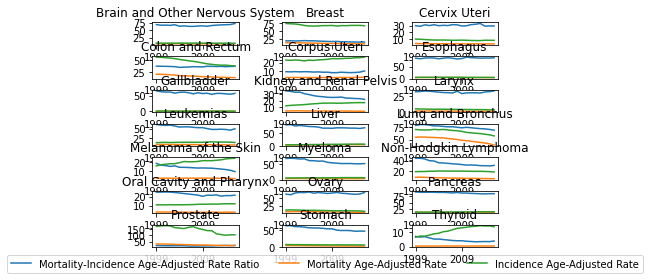

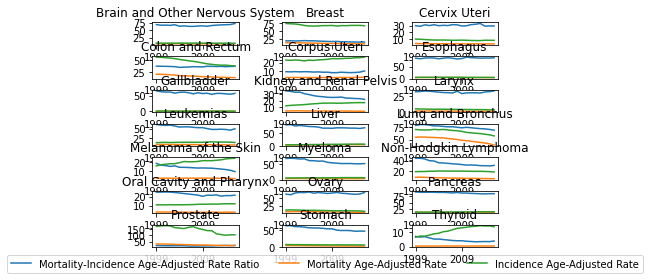

In [16]:
# Plot cancer statistics over time, for each leading cancer site

fig, ax = plt.subplots(7, 3)

categories = 0 # track position in the leading_cancer_sites list
rows = 0 # track row of subplot

while rows <= 6:
    columns = 0 # track column of subplot
    while columns <= 2:
        d = {} # key = year, value = dict (where keys = cancer statistic columns and values = means for each statistic for that year)
        for year in list(cancer_rates["Year"]):
            # get cancer statistics for the site and year and add to dictionary
            d.update({str(year):sum_statistics_by_site_and_year(cancer_rates, leading_cancer_sites[categories], year)})
        
        # convert the dictionary to a DataFrame and plot it
        df = pd.DataFrame(d).T
        df.plot(ax=ax[rows][columns], legend=False, title=leading_cancer_sites[categories])
        
        # increment counters
        columns += 1
        categories += 1
        
        # track progress, as this cell takes a long time to run
        print("here")
    rows += 1

fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)  # create some space below the plots by increasing the bottom-value
ax.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3) # try to make one legend for the entire figure
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
fig

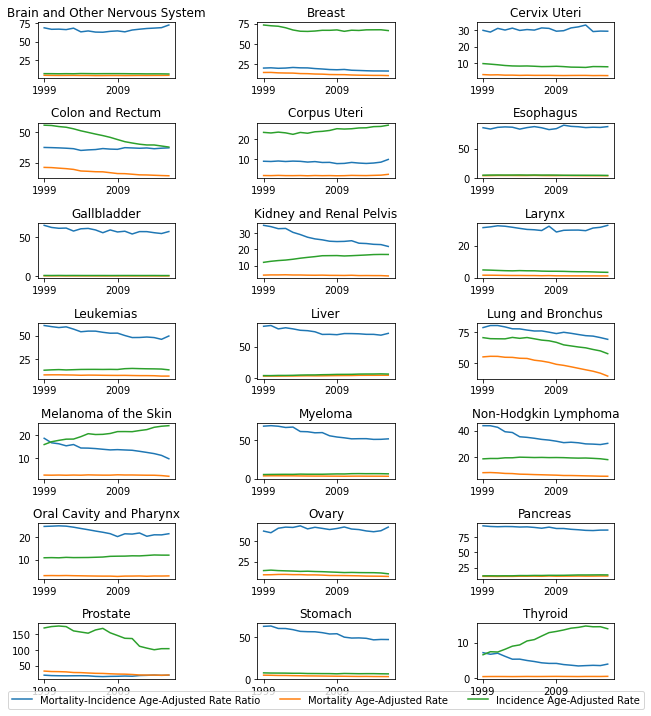

In [29]:
# Try to fix some formatting for the 

fig.set_size_inches(10,12)
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.14, wspace=0.6, hspace=0.8)
fig